# Processamento digital de imagens
Professor Bruno Augusto Dorta Marques

## Atividade 1 

O objetivo desta atividade é implementar operações básicas envolvendo processamento de imagens digitais. 

O conteúdo desta atividade engloba as aulas do [Capítulo 1](https://www.brunodorta.com.br/pdi/config.html) ao [Capítulo 5](https://www.brunodorta.com.br/pdi/reconstruction.html) do livro didático.

A atividade deve seguir algumas regras:
- Não utilize bibliotecas externas que não foram utilizadas durante as aulas. Todo o processamento de imagens deve ser executado em python, utilizando as bibliotecas utilizadas no livro didático.
- Sempre que possível, utilize funções do ``numpy`` para implementar as respostas.
- É permitido a criação de funções e células adicionais para resolver as questões
- Os parâmetros de entrada, e as variáveis de saída devem ser respeitadas e não podem ser alteradas.
- Não altere o nome das funções nas respostas.
- Não entregue a atividade com erros de sintaxe ou de execução. Caso não consiga resolver alguma questão, deixe a questão em branco, retornando ```None``` na devida função.
- Qualquer cópia da internet ou de outras fontes implicará na anulação da questão
- A detecção de plágio nas respostas pode anular toda a atividade.

Dicas:
- Ao final, certifique-se que todas as suas respostas estão sendo executadas corretamente, reinicie o kernel python e execute todas as células sequencialmente do início ao fim.
- Com exceção das imagens de entrada, evite utilizar outras variáveis globais (definidas fora do escopo local da função) para as suas implementações.
- É permitido e aconselhável plotar estágios intermediários das suas respostas, quando elas forem muito complexas. Utilize o plt.imshow, seguido de um plt.show para exibir suas imagens
- Caso a imagem criada esteja muito pequena para ser visualizada, utilize antes da imagem o comando ``plt.figure(figsize=(X,Y))`` onde ``X`` e ``Y`` são os tamanhos mínimos da figura.
- Para plotar imagens em escala de cinzas utilize o comando ``plt.imshow`` com o parâmetro ``cmap="gray"``, por exemplo: ``plt.imshow(imagem, cmap="gray")``
- Para converter entre os formatos ``np.float32`` e ``np.uint8``, utilize a função ``np.array.astype``
- Para copiar uma imagem, utilize a função ``np.copy()``. Isto é particularmente interessante para que você não altere a imagem de entrada.

## Dados Pessoais
Insira os seus dados pessoais logo abaixo.

O trabalho pode ser feito de forma individual ou em duplas.
Caso o trabalho seja feito individualmente, altere apenas o primeiro conjunto de variáveis (``nome_1`` e ``RA_1``).

In [9]:
import numpy as np
import cv2 as cv
import imageio as io
import matplotlib.pyplot as plt

In [10]:
nome_1 = "Diego Guerra"
RA_1 = 11201810534

nome_2 = "David Oliveira Silva"
RA_2 = 11201721357

### Preparando a imagem de entrada:

Carregue uma imagem de sua preferência utilizando o ``io.imread`` e converta para o espaço de cor em escalas de cinzas utilizando ```cv.cvtColor``` com o parâmetro 
``cv.COLOR_RGB2GRAY``.

**A imagem deve ser entregue junto ao ``.ipynb`` no momento de envio da atividade.**

Exemplo:

![Exemplo](imagens/ufabc_gray.png).

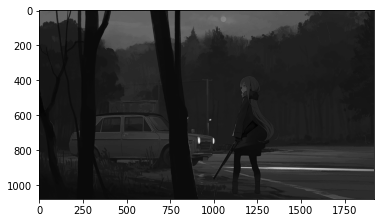

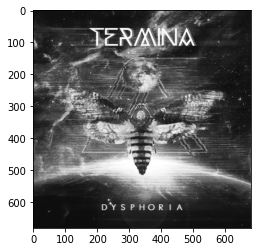

In [11]:
'''Insira o código para leitura (e conversão) da imagem de entrada aqui'''

entrada = 'imagens/forest.png' # substituta para uma entrada válida. 
entrada = io.imread(entrada)
entrada = cv.cvtColor(entrada, cv.COLOR_RGB2GRAY)
plt.imshow(entrada, cmap='gray')
plt.show()

entrada_2 = 'imagens/termina.png'
entrada_2 = io.imread(entrada_2)
entrada_2 = cv.cvtColor(entrada_2, cv.COLOR_RGB2GRAY)
plt.imshow(entrada_2, cmap='gray')
plt.show()

## Questão 1 (2.0)

### Implemente uma função para obter o negativo da imagem. 
Implemente a operação sobre a intensidade de uma imagem em escala de cinzas. \
Os valores de intensidades do negativo de uma imagem consiste nos valores complementares as intensidades originais.

**Exemplo:**

o nível de cinza com valor $0$ passa a ser convertido para valor $255$, \
o nível de cinza com valor $1$ passa a ser convertido para valor $254$ e assim por diante.

![Negativo da imagem](imagens/q1_negativo.png).

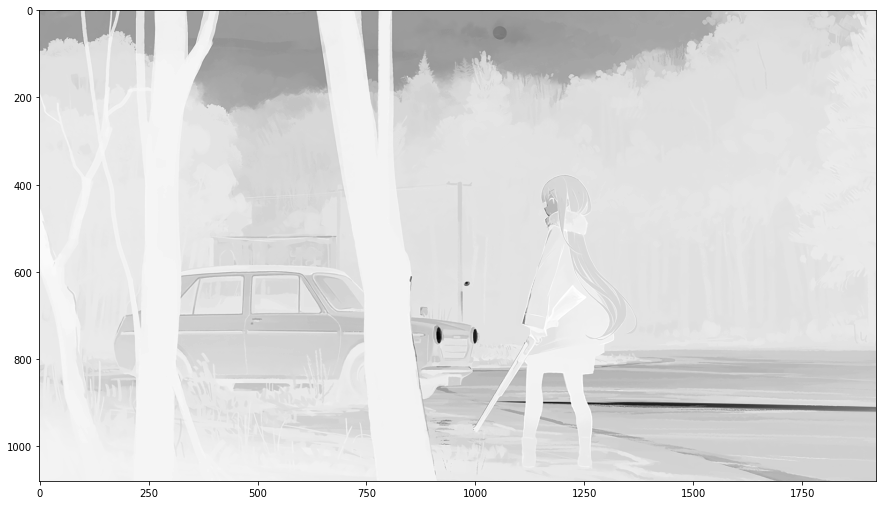

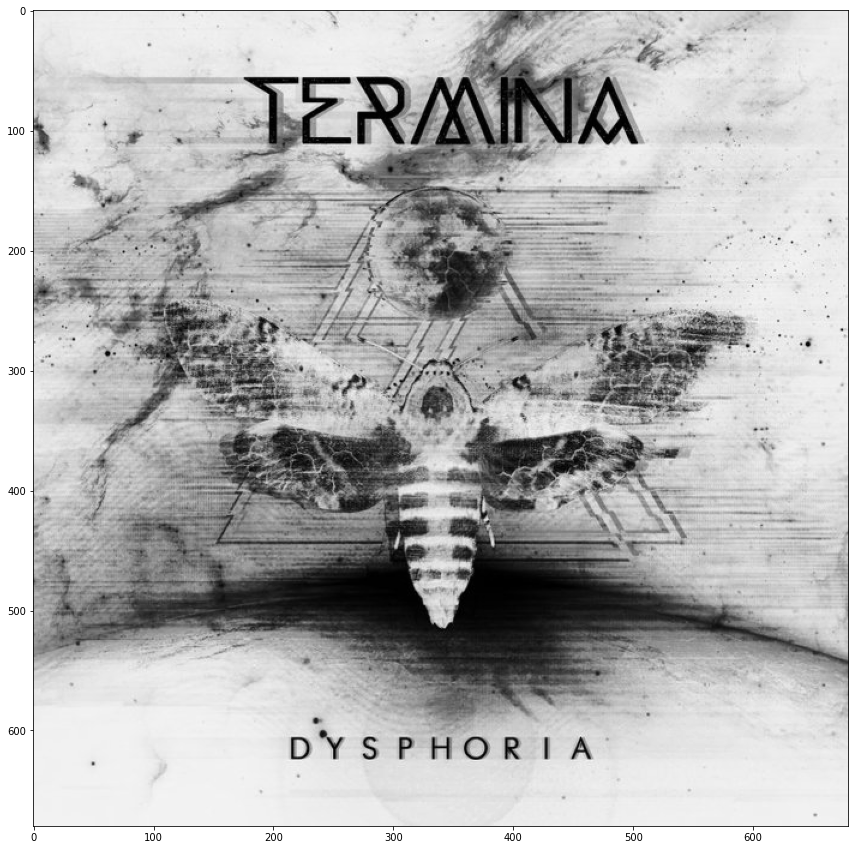

In [12]:
def q1_negativo(imagem):
    # Copia a imagem da entrada
    resultado = imagem.copy()
    
    # Passa por todas as linhas e colunas invertendo os niveis de cinza
    resultado[::1] = np.invert(resultado[::1])
    
    return resultado

negativo = q1_negativo(entrada)
plt.figure(figsize=(15,15))
plt.imshow(negativo, cmap="gray")

negativo = q1_negativo(entrada_2)
plt.figure(figsize=(15,15))
plt.imshow(negativo, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 2 (2.0)
### Implemente uma função para converter o intervalo de intensidades da imagem para o **intervalo dinâmico** $[127; 191]$

**Exemplo:** 

![Intervalo dinâmico](imagens/q2_intervalo.png).

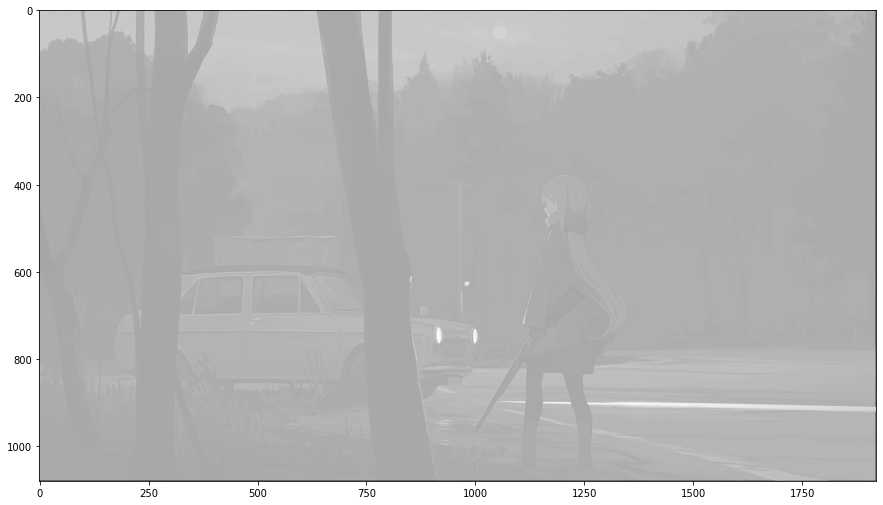

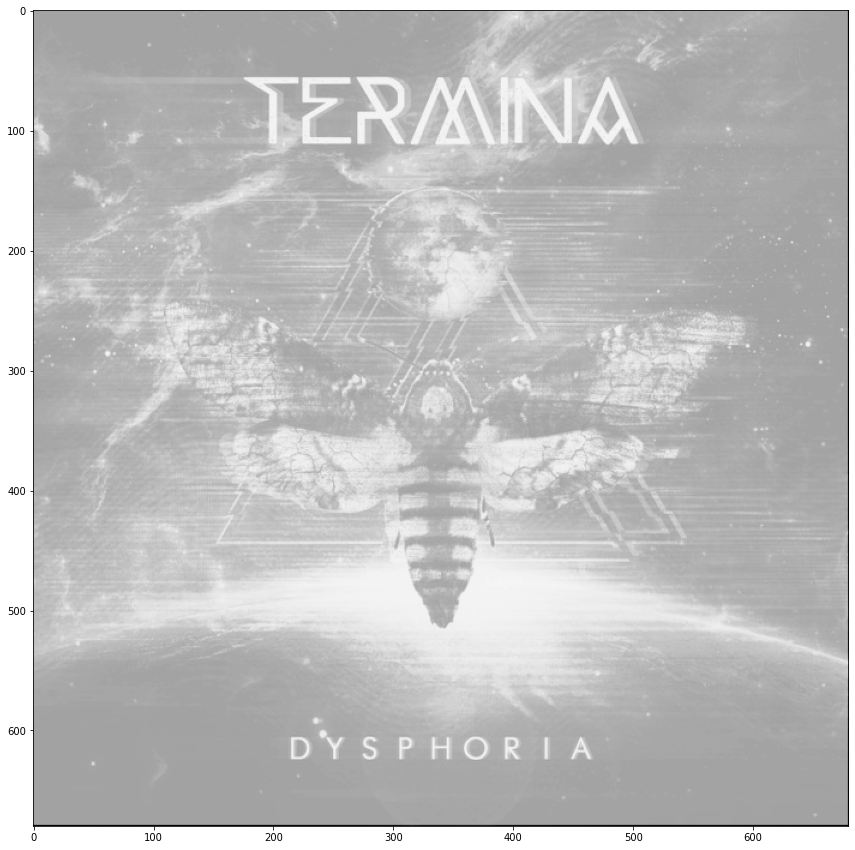

In [13]:
def q2_intervalo(imagem, intervalo=(127,191)):
    resultado = imagem.copy()
    
    height, width = resultado.shape    
    
    for i in range(0, height - 1): 
        for j in range(0, width - 1): 
            pixel = resultado[i, j] 
            pixel = ( 64*pixel // 255 ) + 127
            resultado[i, j] = pixel     
    
    return resultado


intervalo = q2_intervalo(entrada)
plt.figure(figsize=(15,15))
plt.imshow(intervalo, cmap="gray")

intervalo = q2_intervalo(entrada_2)
plt.figure(figsize=(15,15))
plt.imshow(intervalo, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 3 (2.0)
### Implemente uma função para inverter espacialmente (entrelaçar) os valores dos pixels das linhas **impares** da imagem.

Considere a primeira linha como linha $0$. \
Considere a linha $0$ como *par*. 

**Exemplo:**


os valores dos pixels da linha $0$ serão posicionados da esquerda para a direita; \
os valores dos pixels da linha $1$ serão posicionados da direita para a esquerda; \
os valores dos pixels da linha $2$ serão posicionados da esquerda para a direita; \
e assim por diante.

![Entrelaçamento](imagens/q3_invert.png) .

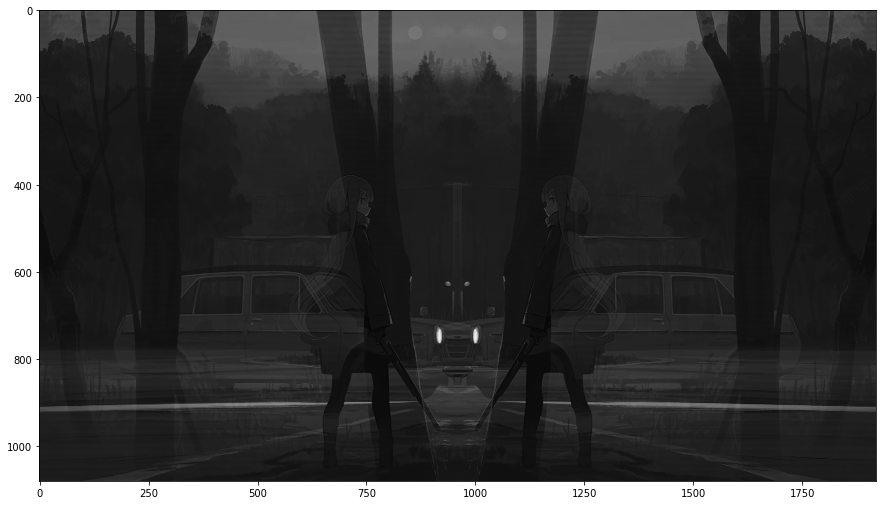

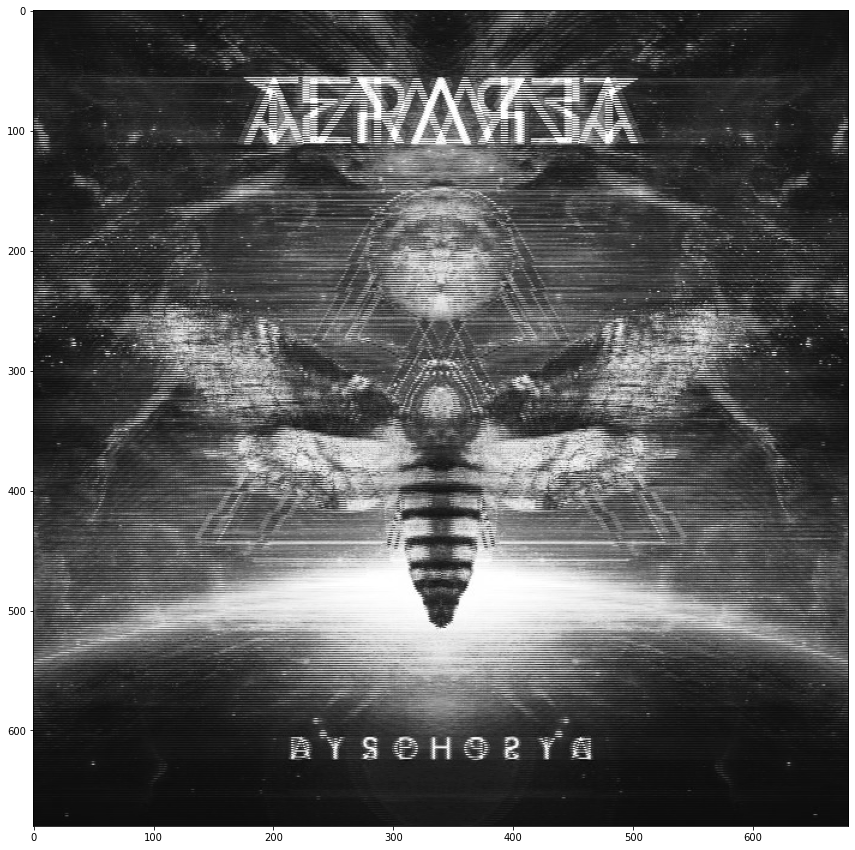

In [14]:
def q3_inverter(imagem, modo="impar"):
    # Copia a imagem de entrada
    resultado = imagem.copy()
    
    # Percorre todas as linhas impares e as inverte
    resultado[1::2, :] = resultado[1::2, ::-1]
    
    return resultado

invertido = q3_inverter(entrada)
plt.figure(figsize=(15,15))
plt.imshow(invertido, cmap="gray")

invertido = q3_inverter(entrada_2)
plt.figure(figsize=(15,15))
plt.imshow(invertido, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 4 (2.0)
### Implemente uma função que faça a reflexão de linhas e colunas. Primeiro faça o espelhamento das linhas da parte superior para a parte inferior da imagem. Em seguida, faça o espelhamento das colunas da parte esquerda na parte direita da imagem.


Faça primeiro a operação nas linhas. Utilizando o resultado das linhas, faça a operação nas colunas.

Sempre quando houve algum arredondamento, faça o arredondamento para baixo. \
Por exemplo, $201 / 2 = 100$. Para facilitar, você pode utilizar a divisão inteira no python ```201//2```


Teste seu algoritmo para imagens com resolução espacial *par* e *impar*.

*Exemplo:* 

![espelhamento](imagens/q4_mirror.png).

(1080, 1920)
(679, 679)


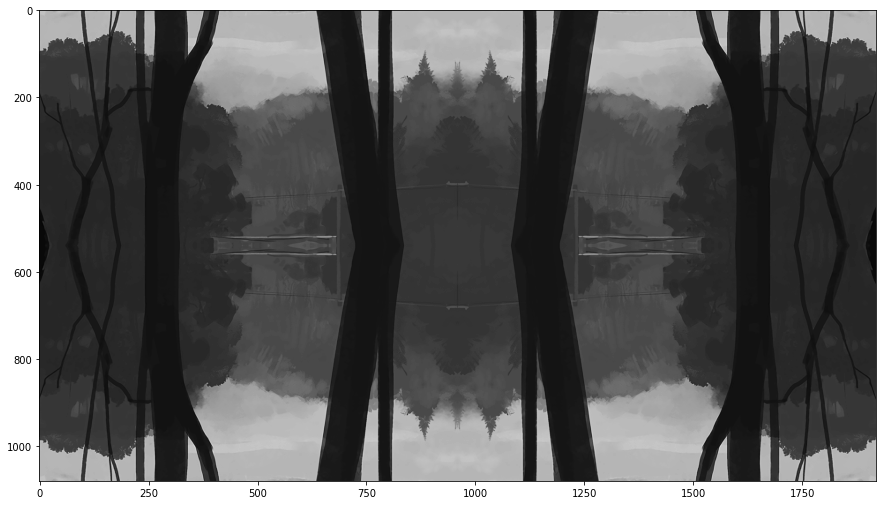

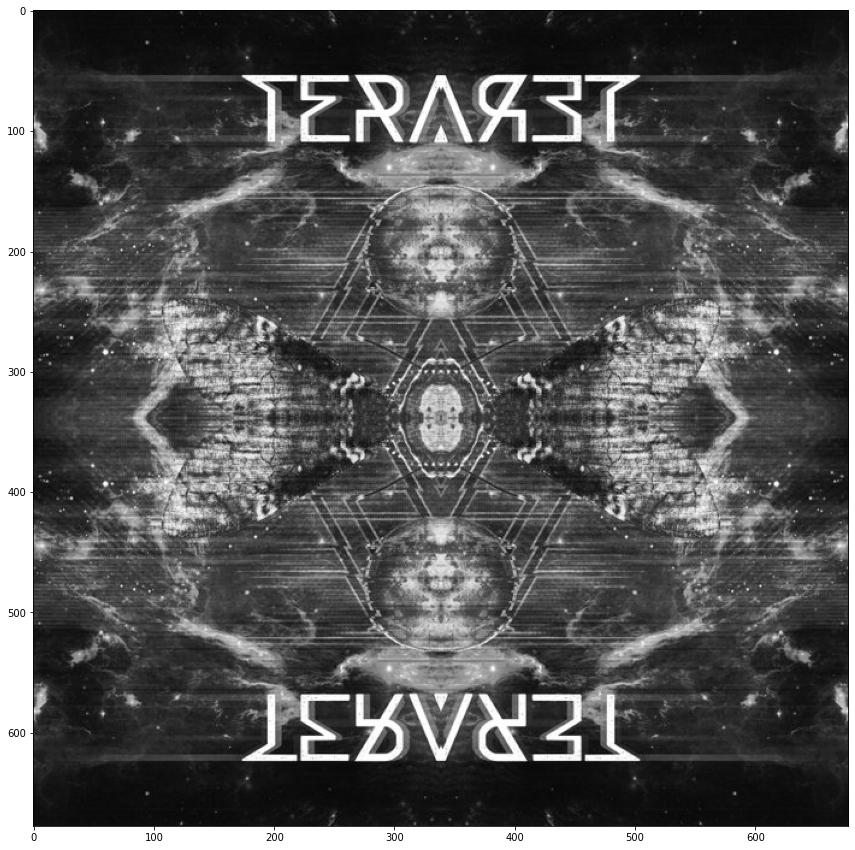

In [15]:
def q4_espelhar(imagem):
    # Copia a imagem de entrada
    resultado = imagem.copy()
    
    rows, cols = resultado.shape
    
    # Corta a imagem caso ela possua tamanho impar em algum eixo
    if(rows%2 != 0):
        resultado = np.delete(resultado, 0, 0)
        rows = resultado.shape[0]
    if(cols%2 != 0):
        resultado = np.delete(resultado, 0, 1)
        cols = resultado.shape[1]
    
    # Inverte as linhas da metade de cima
    resultado[rows//2:] = np.flip(resultado[0:rows//2], 0)
    
    # Inverte as colunas da metade esquerda
    resultado[:, cols//2:] = np.flip(resultado[:, 0:cols//2], 1)

    return resultado

# Testando com imagem par
print(entrada.shape)
espelho = q4_espelhar(entrada)
plt.figure(figsize=(15,15))
plt.imshow(espelho, cmap="gray")


# Testando com imagem impar
entrada_impar = np.delete(entrada_2, 0, 0)
entrada_impar = np.delete(entrada_impar, 0, 1)
print(entrada_impar.shape)
espelho = q4_espelhar(entrada_impar)
plt.figure(figsize=(15,15))
plt.imshow(espelho, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.

Caso a imagem possua tamanho par em ambos os eixos a divisão realizada pelo espelhamento é feita exatamente no meio da imagem. Caso algum dos eixos possua tamanho ímpar, será removido o primeiro elemento do array do respectivo eixo, de modo a tornar a imagem par e realizar a divisão sem problemas. 

## Questão 5 (2.0)
### Implemente uma função que faça um mosaico a partir de uma imagem.

O mosaico deve seguir o esquema de blocos, supondo que cada bloco esteja identificado como abaixo:


|  **0** |  **1** |  **2** |  **3** |  **4** |
|:------:|:------:|:------:|:------:|:------:|
|  **5** |  **6** |  **7** |  **8** | **9** | 
| **10** | **11** | **12** | **13** | **14** |
| **15** | **16** | **17** | **18** | **19** |

a nova configuração deve respeitar a seguinte numeração dos blocos:

|  **3** |  **2** |  **12** |  **0** |  **4** |
|:------:|:------:|:------:|:------:|:------:|
| **5** | **17** |  **7** |  **8** | **15** | 
| **16** |  **11** |  **1** | **19** | **18** |
|  **9** | **6** |  **10** | **14** | **13** |


Caso a resolução da sua imagem não seja múltipla da quantidade de blocos, você pode cortar ou redimensionar a sua imagem antes de executar o algoritmo.

**Exemplo:**

![mosaico](imagens/q5_mosaic.png) .

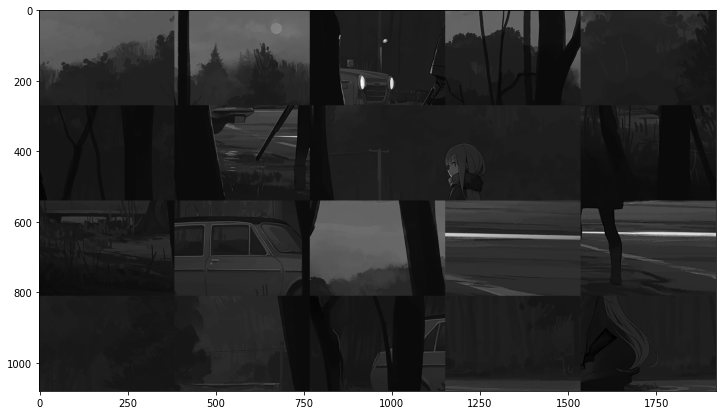

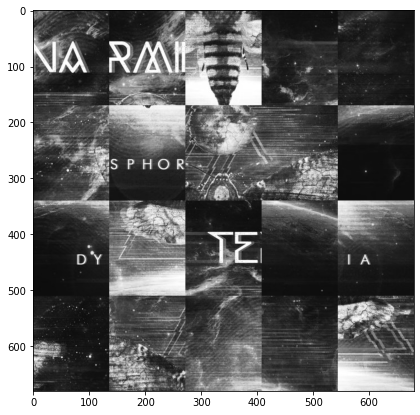

In [16]:

def q5_mosaico(imagem, num_linhas=4, num_cols=5):
    # Copia a imagem da entrada
    resultado = imagem.copy()
    
    lista_matrizes = []
    
    linhas = resultado.shape[0] // num_linhas
    colunas = resultado.shape[1] // num_cols
    
    # Percorre a imagem armazenando cada pedaço do mosaico em um item do array
    for i in range( num_linhas ):
        for j in range( num_cols ):
            lista_matrizes.append( resultado[i*linhas:(i+1)*linhas, j*colunas:(j+1)*colunas] )  
        
    linha_1 = []
    linha_2 = []
    linha_3 = []
    linha_4 = []
    
    # Junta as linas do mosaico final
    linha_1 = np.hstack((lista_matrizes[3], lista_matrizes[2], lista_matrizes[12], lista_matrizes[0], lista_matrizes[4]))
    linha_2 = np.hstack((lista_matrizes[5], lista_matrizes[17], lista_matrizes[7], lista_matrizes[8], lista_matrizes[15]))
    linha_3 = np.hstack((lista_matrizes[16], lista_matrizes[11], lista_matrizes[1], lista_matrizes[19], lista_matrizes[18]))
    linha_4 = np.hstack((lista_matrizes[9], lista_matrizes[6], lista_matrizes[10], lista_matrizes[14], lista_matrizes[13]))

    # Junta as colunas do mosaico final a partir das linhas criadas acima
    resultado = np.vstack((linha_1, linha_2, linha_3, linha_4))
    
    return resultado

mosaico = q5_mosaico(entrada)
plt.figure(figsize=(15,7))
plt.imshow(mosaico, cmap='gray')

mosaico = q5_mosaico(entrada_2)
plt.figure(figsize=(15,7))
plt.imshow(mosaico, cmap='gray')

Utilize este espaço para escrever comentários sobre a sua resposta.